In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"/content/Cardiotocographic.csv")
data.head()

# 1. Data Cleaning and Preparation

print("1.Data Cleaning and Preparation\n")

missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

data_cleaned = data.dropna()
print("\nData types before conversion:\n", data_cleaned.dtypes)

data_cleaned = data_cleaned.apply(pd.to_numeric, errors='coerce')
print("\nData types after conversion:\n", data_cleaned.dtypes)

from scipy.stats import zscore

z_scores = np.abs(zscore(data_cleaned))
outliers = (z_scores > 3).all(axis=1)
print("\nNumber of outliers detected:", np.sum(outliers))
data_no_outliers = data_cleaned[~outliers]



1.Data Cleaning and Preparation

Missing values in each column:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

Data types before conversion:
 LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

Data types after conversion:
 LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

Number of outliers detected: 0


In [2]:
# 2. Statistical Summary

print("2.Statistical Summary")

summary = data_no_outliers.describe()
print("Statistical summary:\n", summary)

mean_fhr = summary.loc['mean', 'LB']
median_fhr = summary.loc['50%', 'LB']
std_fhr = summary.loc['std', 'LB']
print("\nMean baseline for FHR:",mean_fhr)
print("\nMedian baseline for FHR:",median_fhr)
print("\nStandard deviation for FHR:",std_fhr)

2.Statistical Summary
Statistical summary:
                 LB           AC           FM           UC           DL  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean    133.343598     0.003202     0.009963     0.004388     0.001892   
std      11.270154     0.004324     0.067870     0.003350     0.003348   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001838     0.000000   
50%     133.000000     0.001631     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002554     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean      0.000003     0.000175    46.996929     1.361006    10.353647   
std       0.000142     0.000840    18.847737     1.173164    21.282

3.Data Visualization

Data Visualization


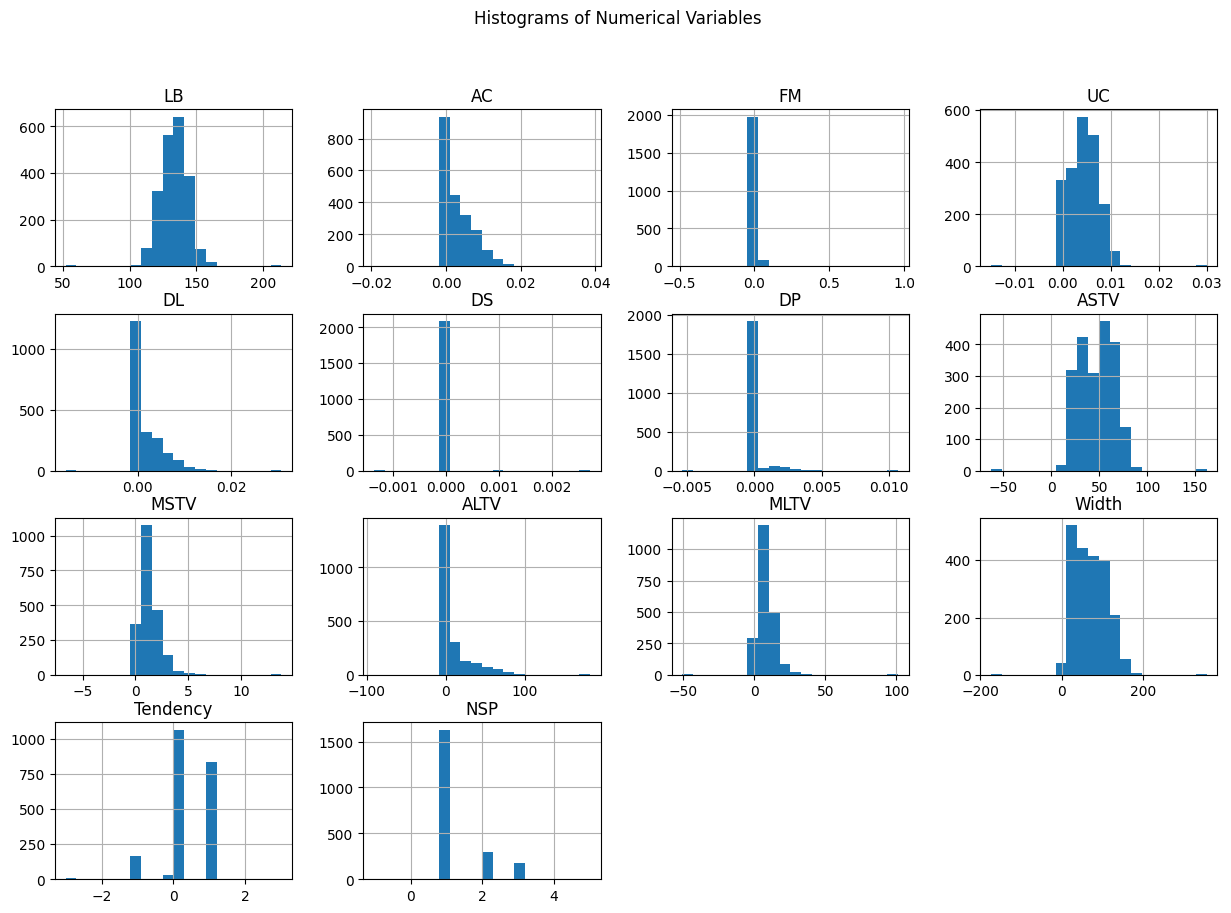

In [3]:
# 3. Data Visualization

print("3.Data Visualization")

print("\nData Visualization")

data_no_outliers.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

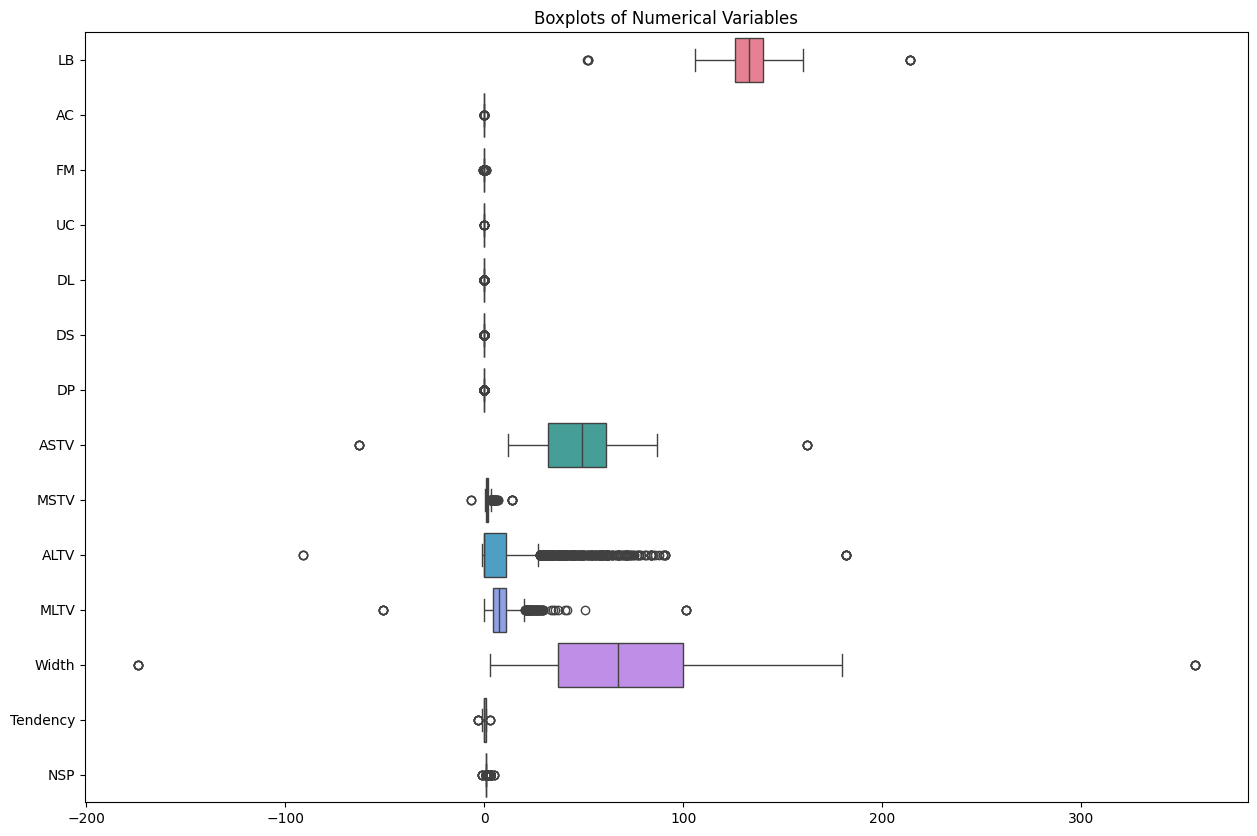

In [4]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_no_outliers, orient='h')
plt.title('Boxplots of Numerical Variables')
plt.show()

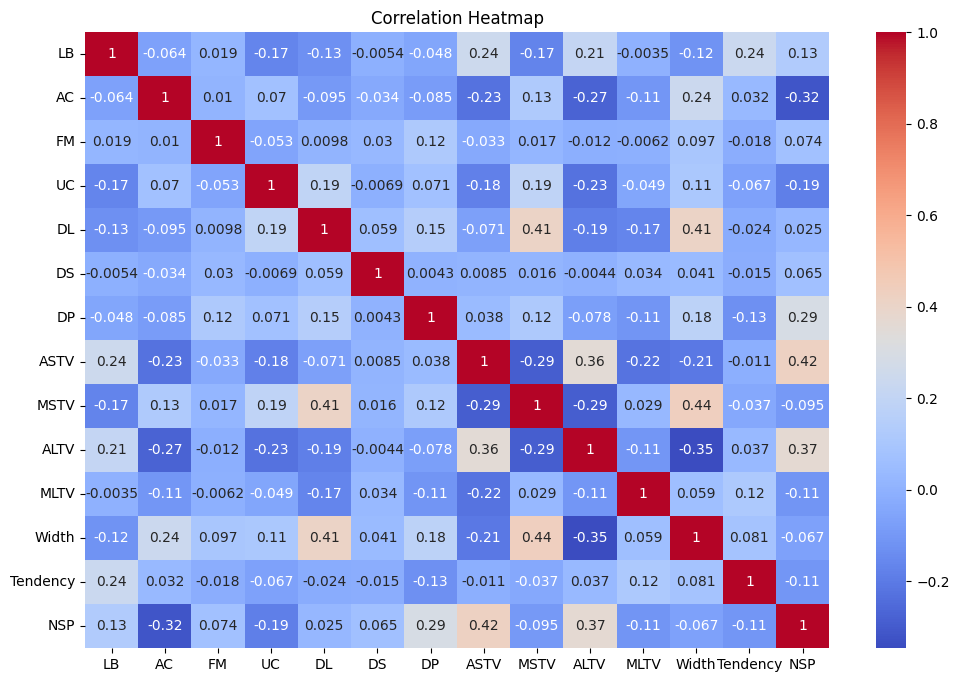

In [5]:
plt.figure(figsize=(12, 8))
correlation_matrix = data_no_outliers.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
sns.pairplot(data_no_outliers)
plt.suptitle('Pair Plot of Variables', y=1.02)
plt.show()

In [ ]:
# 4. Pattern Recognition and Insights

print("4. Pattern Recognition and Insights\n")

strong_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
print("Strong correlations:\n", strong_correlations)


In [ ]:
# 5. Conclusion

Summary of key insights:

1. The mean baseline fetal heart rate (FHR) is 133.34 bpm, with a standard deviation of 11.27.
2. The correlation heatmap reveals strong positive and negative correlations between certain variables.
3. Boxplots and histograms show the distribution and spread of numerical variables, indicating the presence of outliers.

Potential Impact:

1. These findings can help healthcare professionals monitor fetal health more accurately.
2. Strong correlations between variables may provide insights into underlying physiological processes.
3. Further analysis could focus on time-related patterns if temporal data is included.

Recommendations for Further Analysis:

1. Perform a more detailed analysis of temporal patterns if time-related data is available.
2. Investigate the causes of outliers and their impact on the overall analysis.
3. Use advanced machine learning models to predict outcomes based on these variables.